In [170]:
import pandas as pd
from numpy import percentile
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import scipy.stats as stats
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [171]:
# read data
data = pd.read_csv("../data/train.csv")

In [172]:
# put salesprice on first position
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [173]:
display(data.columns.tolist())
display(cols)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

['SalePrice',
 'Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',


In [174]:
# display sample data entries
data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
655,656,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,ImStucc,BrkFace,381.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,525,525,GasA,TA,Y,SBrkr,525,567,0,1092,0,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1971.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Family,88000
914,915,160,FV,30.0,3000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,Stone,76.0,Gd,TA,PConc,Gd,TA,Av,GLQ,294,Unf,0,318,612,GasA,Ex,Y,SBrkr,612,612,0,1224,0,0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2009.0,RFn,2,528,TA,TA,Y,0,234,0,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,173733
1380,1381,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,Fa,BrkTil,TA,Fa,No,Rec,203,Unf,0,661,864,GasA,TA,N,FuseF,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1938.0,Unf,1,200,TA,Fa,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,58500
1356,1357,20,RL,NaN,9477,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1966,1966,Gable,CompShg,HdBoard,HdBoard,BrkFace,65.0,TA,TA,CBlock,TA,TA,No,Rec,340,Unf,0,524,864,GasA,TA,Y,SBrkr,892,0,0,892,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1966.0,RFn,1,264,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,10,2008,WD,Normal,110000
1040,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1957,2000,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,67.0,TA,TA,CBlock,TA,TA,No,Rec,168,BLQ,682,284,1134,GasA,Ex,Y,SBrkr,1803,0,0,1803,1,0,2,0,3,1,TA,8,Maj1,1,TA,Attchd,1957.0,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,220.0,Gd,TA,PConc,Ex,TA,Av,GLQ,984,Unf,0,280,1264,GasA,Ex,Y,SBrkr,1282,1414,0,2696,1,0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2007.0,Fin,3,792,TA,TA,Y,120,184,0,0,168,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
173,174,20,RL,80.0,10197,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1961,1961,Gable,CompShg,WdShing,Wd Shng,BrkCmn,491.0,TA,TA,CBlock,TA,TA,No,ALQ,288,Rec,374,700,1362,GasA,TA,Y,SBrkr,1362,0,0,1362,1,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1961.0,Unf,2,504,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,6,2008,COD,Normal,163000
1321,1322,20,RL,NaN,6627,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,3,6,1949,1950,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Floor,TA,N,SBrkr,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1955.0,Unf,1,287,TA,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,72500
565,566,70,RL,66.0,6858,Pave,NaN,Reg,Bnk,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,2Story,6,4,1915,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,806,806,GasA,TA,N,FuseF,841,806,0,1647,1,0,1,1,4,1,Fa,6,Typ,0,NaN,Detchd,1920.0,Unf,1,216,TA,TA,Y,0,66,136,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,128000
436,437,50,RM,40.0,4400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,8,1920,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,64

In [175]:
# split categorical and numerical data
data_categorical = pd.concat([data['SalePrice'], data.select_dtypes(include=[object])], axis=1)
data_numerical = data.select_dtypes(exclude=[object])
data_categorical_cols = data_categorical.columns.tolist()
data_numerical_cols = data_numerical.columns.tolist()

display("categorical", len(data_categorical_cols))
display("numerical", len(data_numerical_cols))

'categorical'

44

'numerical'

38

In [176]:
data_categorical_cols

['SalePrice',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

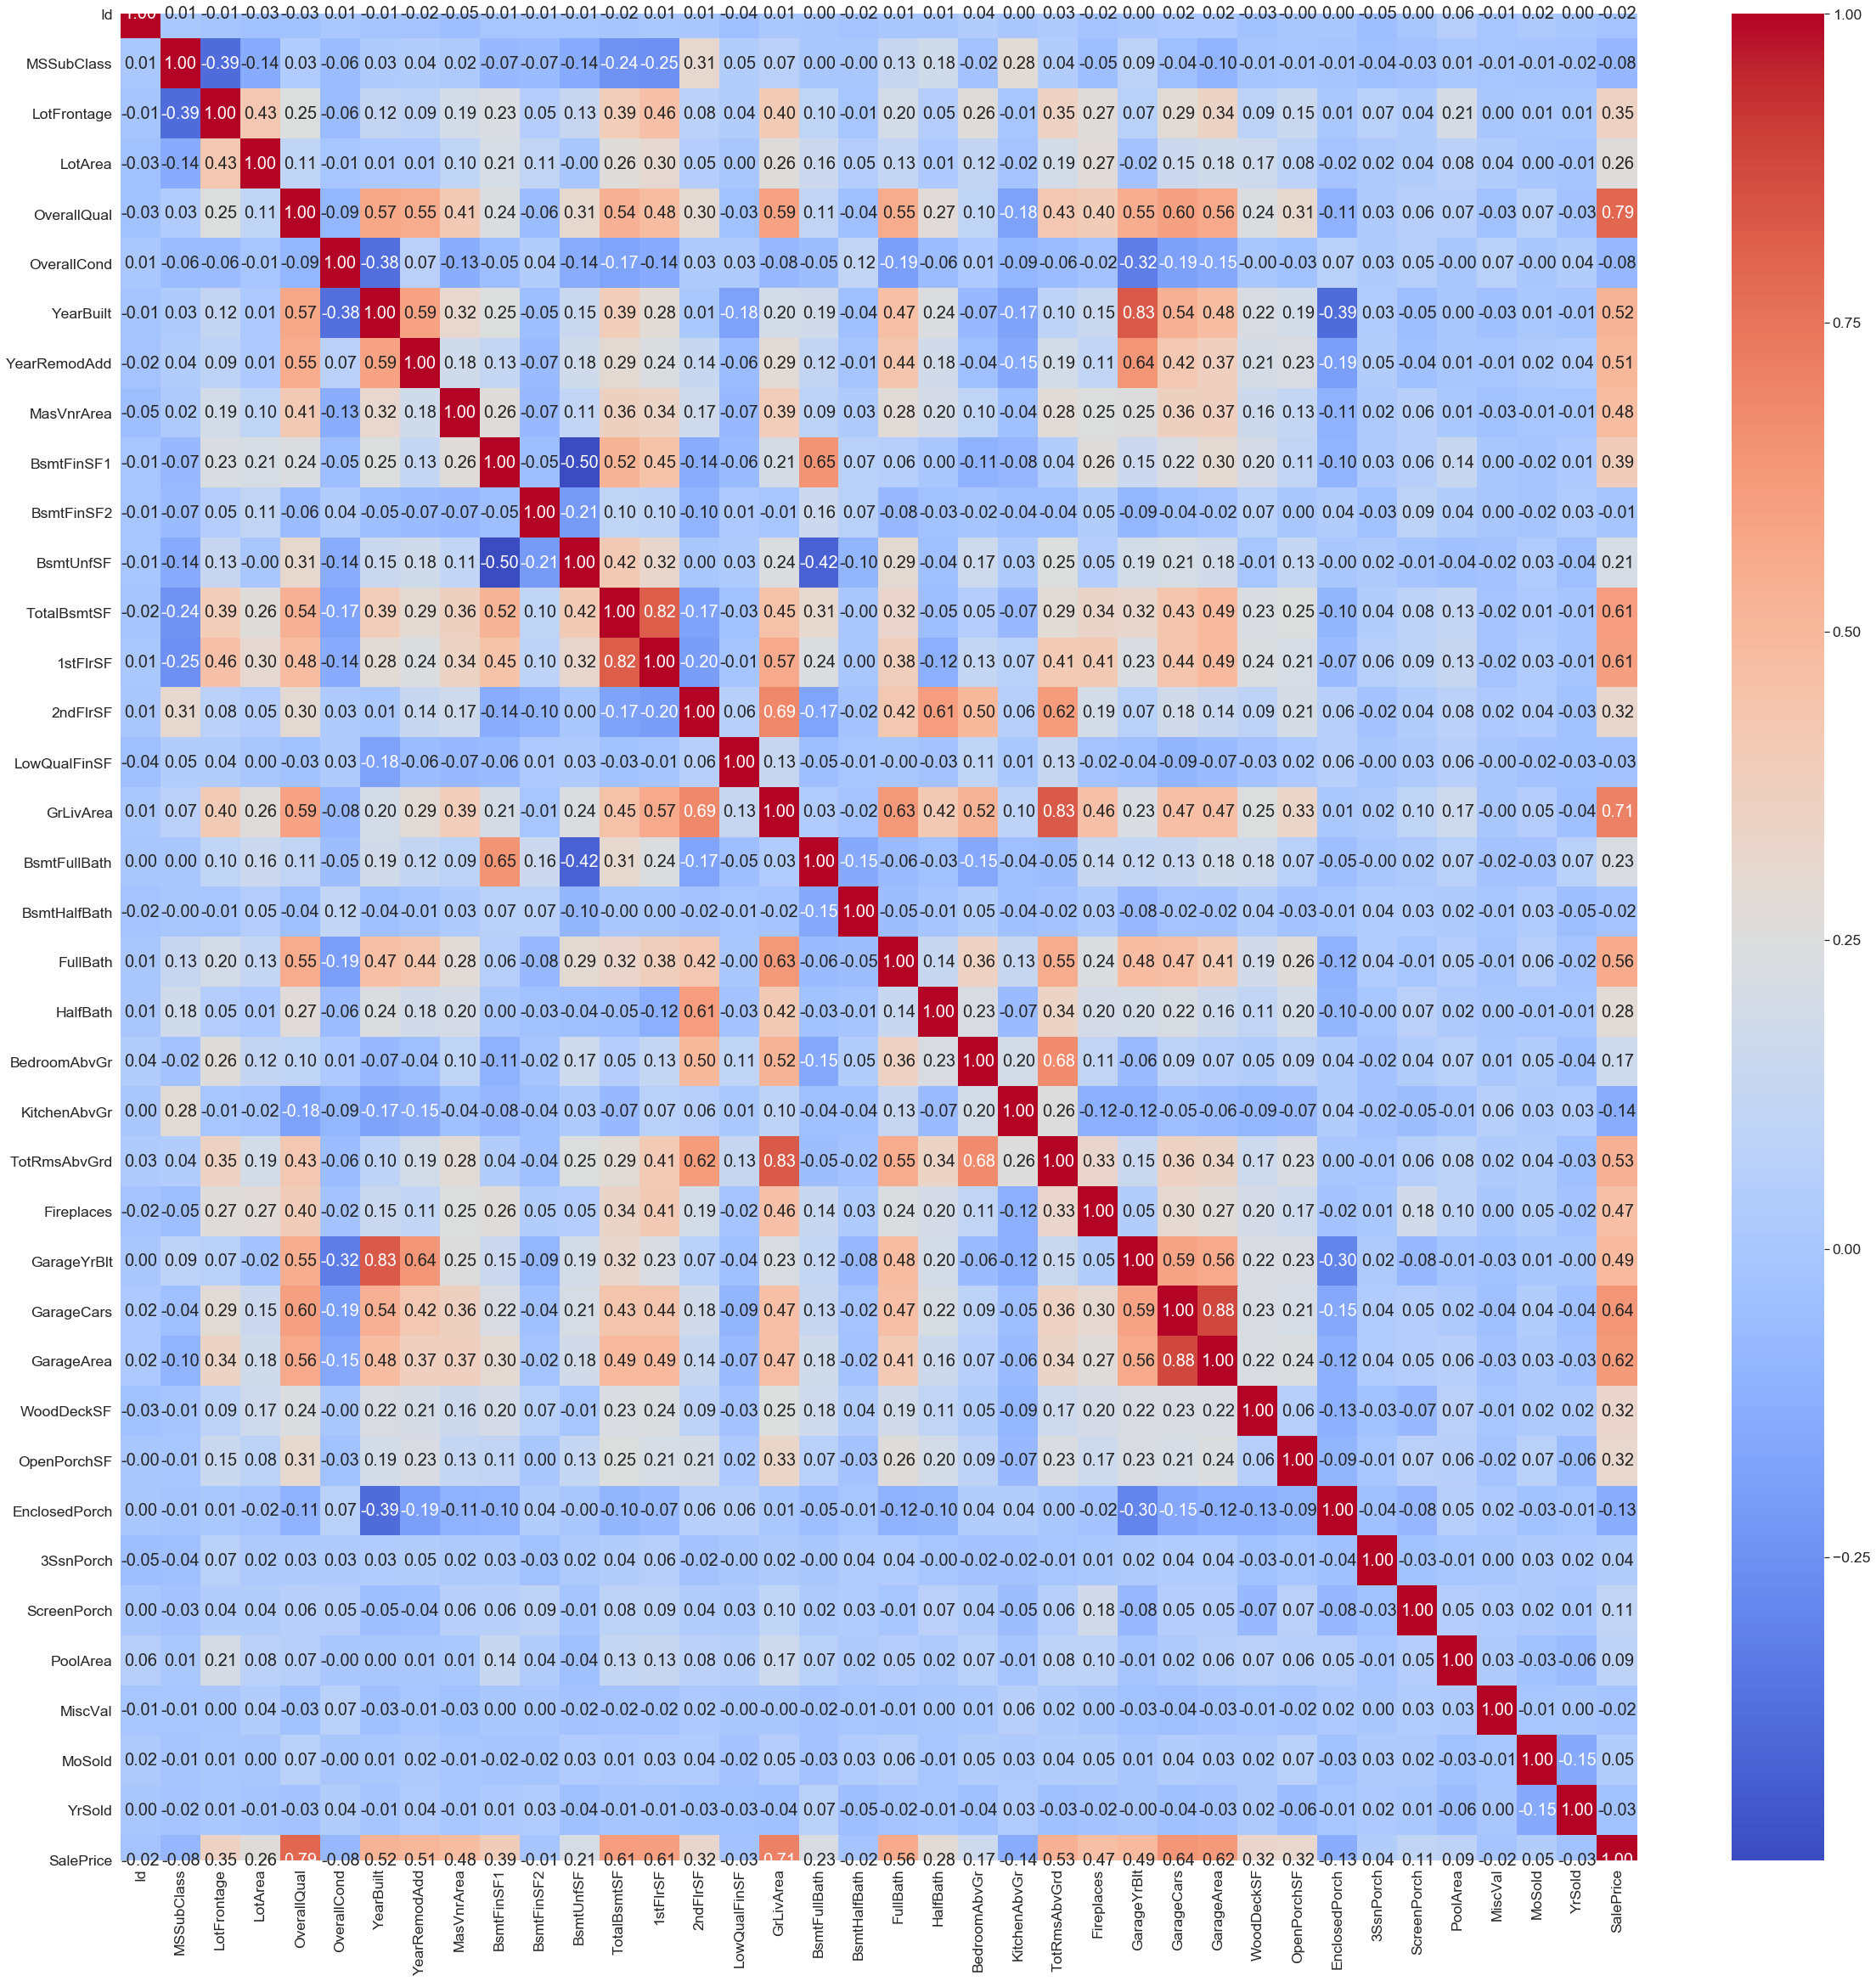

In [177]:
plt.figure(figsize=(40,40))
sns.set(font_scale=1.6)
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 20})



In [151]:
# list all numerical columns that get to remain
sns.set()
chosen_cols_numerical = ['OverallQual', 'GrLivArea', 'GarageCars',
        'FullBath', 'YearBuilt', 'Fireplaces', 'TotalBaths', 'TotalSF']
# sns.pairplot(data[chosen_cols_numerical], size = 2.5)

In [199]:
# see what cols have missing values
iter_data = data[data_numerical_cols]
data_cols = list(iter_data.columns)
counter = 1
for colname in data_cols:
    if colname == 'Id' or colname == 'SalePrice': continue
    col_values = list(iter_data[colname].unique())
    if np.nan in col_values or iter_data[colname].isna().sum() > 0:
        display(">>NAN {}. {} - {} : {}".format(counter, colname, data[colname].dtype , col_values))
    else: 
#         display("{}. {} - {} : {}".format(counter, colname, data[colname].dtype , col_values))
        1+1
        
    counter+=1

In [196]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [195]:
def fillnas(data_frame, colname, value):
    data_frame[colname].fillna(value, inplace=True)

In [192]:
# replace missing values categorical
data['BsmtQual'].fillna('0', inplace=True)
data['Alley'].fillna('0', inplace=True)
data['BsmtCond'].fillna('0', inplace=True)
data['BsmtExposure'].fillna('0', inplace=True)
data['BsmtFinType1'].fillna('0', inplace=True)
data['BsmtFinType2'].fillna('0', inplace=True)

data['FireplaceQu'].fillna('0', inplace=True)
data['GarageType'].fillna('0', inplace=True)
data['GarageFinish'].fillna('0', inplace=True)
data['GarageQual'].fillna('0', inplace=True)
data['GarageCond'].fillna('0', inplace=True)
data['PoolQC'].fillna('0', inplace=True)
data['Fence'].fillna('0', inplace=True)
data['MiscFeature'].fillna('0', inplace=True)
data['Electrical'].fillna('SBrkr', inplace=True)
data['MasVnrType'].fillna('None', inplace=True)



In [197]:
# replacing missing values numerical
fillnas(data, 'LotFrontage', 0)
fillnas(data, 'MasVnrArea', 0)
fillnas(data, 'GarageYrBlt', 0)

In [155]:
bath_vars = [x for x in list(data_numerical.columns) if 'Bath' in x]
bath_vars

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

In [200]:
# combine all bath variables into one 
data['TotalBaths'] = data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath'] + 0.5 * data['HalfBath'] + data['FullBath']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBaths
299,300,20,RL,80.0,14000,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,8,1950,2004,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,1092,1092,GasA,Ex,Y,SBrkr,1152,0,0,1152,0,1,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1950.0,Unf,1,300,TA,TA,Y,0,36,0,0,0,0,0,GdPrv,0,0,8,2009,WD,Family,158500,1.5
1010,1011,50,RL,115.0,21286,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1.5Fin,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,720,720,GasA,TA,Y,SBrkr,720,551,0,1271,0,0,2,0,4,1,TA,7,Typ,1,Gd,Attchd,1948.0,Unf,1,312,TA,TA,Y,0,0,108,0,0,0,0,0,0,0,8,2008,WD,Normal,135000,2.0
89,90,20,RL,60.0,8070,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,0,0,0.0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,0,8,2007,WD,Normal,123600,2.0
651,652,70,RL,60.0,9084,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,2Story,4,5,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,Unf,0,Unf,0,755,755,GasA,TA,Y,SBrkr,755,755,0,1510,1,0,1,0,4,1,TA,7,Typ,1,Gd,Detchd,1940.0,Unf,1,296,Fa,Po,P,120,0,0,0,0,0,0,MnPrv,0,0,10,2009,WD,Normal,108000,2.0
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,0,0,0,0,5,2010,WD,Normal,127000,2.0


In [201]:
data['TotalSF'] = data['GrLivArea'] + data['TotalBsmtSF']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBaths,TotalSF
1009,1010,50,RL,60.0,6000,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,5,1926,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Ex,Y,SBrkr,1008,0,514,1522,0,0,2,0,4,1,TA,7,Typ,0,0,0,0.0,0,0,0,0,0,P,0,0,138,0,0,0,0,0,0,0,6,2006,WD,Normal,102000,2.0,2530
1179,1180,20,RL,77.0,8335,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,0,0,0,0,0,0,0,0,0,GasA,Gd,Y,SBrkr,1124,0,0,1124,0,0,1,0,3,1,TA,5,Min2,1,Gd,0,0.0,0,0,0,0,0,N,0,36,190,0,0,0,0,0,0,0,4,2006,WD,Normal,93000,1.0,1124
172,173,160,RL,44.0,5306,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,2Story,7,7,1987,1987,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,495,Rec,215,354,1064,GasA,Gd,Y,SBrkr,1064,703,0,1767,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1987.0,RFn,2,504,Gd,TA,Y,441,35,0,0,0,0,0,0,0,0,6,2006,WD,Normal,239000,3.0,2831
995,996,50,RL,51.0,4712,Pave,0,IR1,Lvl,AllPub,Inside,Mod,BrkSide,Feedr,Norm,1Fam,1.5Fin,4,7,1946,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,384,Unf,0,363,747,GasA,TA,Y,SBrkr,774,456,0,1230,1,0,1,1,3,1,TA,5,Typ,0,0,Detchd,1946.0,Unf,1,305,TA,TA,Y,0,57,0,0,63,0,0,MnPrv,0,0,8,2006,WD,Abnorml,121600,2.5,1977
1276,1277,60,RL,0.0,12936,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,6,1972,1972,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,Gd,No,BLQ,593,Unf,0,130,723,GasA,TA,Y,SBrkr,735,660,0,1395,0,1,1,1,3,1,TA,6,Typ,1,TA,Attchd,1972.0,Unf,2,497,TA,TA,Y,294,116,0,0,0,0,0,0,0,0,12,2009,WD,Normal,162000,2.0,2118


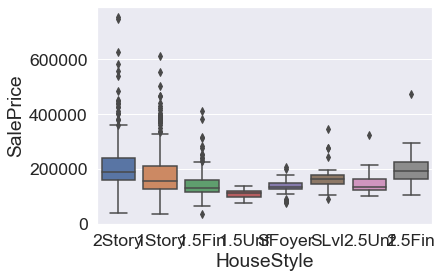

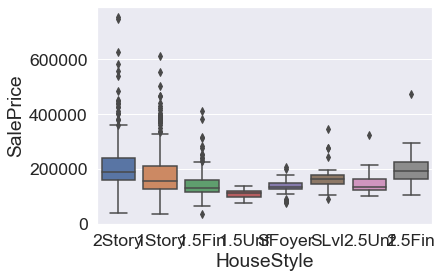

In [161]:
plt.figure(1)
sns.boxplot(x="HouseStyle", y='SalePrice', data=data_categorical)
plt.figure(2)
sns.boxplot(x="HouseStyle", y='SalePrice', data=data_categorical)
# deal with categorical data
# data_matrix = data_numerical.as_matrix()

# features = mutual_info_regression(data_matrix, data_numerical['SalePrice'].as_matrix())
# features

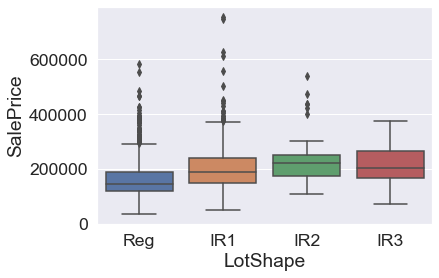

In [116]:
# f, axes = plt.subplots(2, 1)
# colcnt, rowcnt = 0, 0
# for i, colname in enumerate(list(data_categorical.columns)[1:5]):
#     sns.boxplot(x="Alley", y='SalePrice', data=data_categorical, ax=axes[rowcnt, colcnt])
#     rowcnt, colcnt = (rowcnt+1)%2, (colcnt+1)%2



In [67]:
# categorize the string column "city", leave zipcode and country alone as they don't matter
bsmtqual = data["BsmtQual"].apply(lambda x: 'None' if x is np.nan else x).astype("category")
bsmtqual.cat.codes.unique()

array([2, 4, 0, 3, 1], dtype=int64)

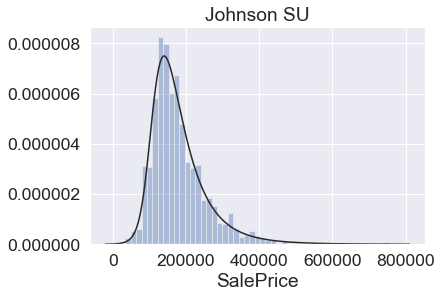

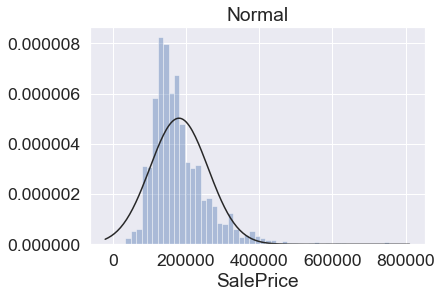

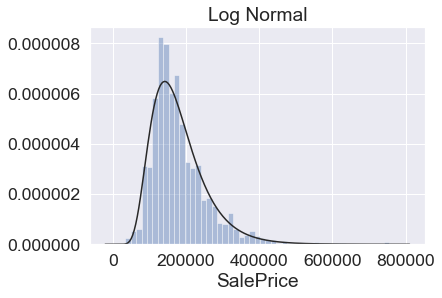

In [165]:
y = data['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)


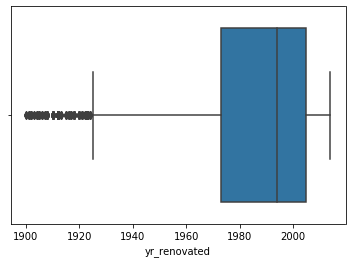

In [92]:
sns.boxplot(data['yr_renovated'])

In [60]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3-q1
iqr

price            332087.50
bedrooms              1.00
bathrooms             0.75
sqft_living        1160.00
sqft_lot           6000.50
floors                1.00
waterfront            0.00
view                  0.00
condition             1.00
sqft_above         1110.00
sqft_basement       610.00
yr_built             46.00
yr_renovated       1999.00
city_cat             18.00
dtype: float64

In [158]:
# print(data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))

In [89]:
data.loc[data['yr_renovated'] == 0, 'yr_renovated'] = data['yr_built'] 

In [90]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,city_cat,house_age
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,36,64
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921,709 W Blaine St,Seattle,WA 98119,USA,35,98
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966,26206-26214 143rd Ave SE,Kent,WA 98042,USA,18,53
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963,857 170th Pl NE,Bellevue,WA 98008,USA,3,56
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,31,43
